In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def gradient_descent(data_train, data_val, lr=0.001, ep=0.0001, max_iter=10000):
    X_train, y_train = data_train
    X_val, y_val = data_val

    converged = False
    count_iter = 0
    w0 = np.random.rand(1)
    w1 = np.random.rand(1)
    n_train = len(y_train)
    n_val = len(y_val)

    J_train = (1 / (2 * n_train)) * sum(
        [(w0 + w1 * X_train[i] - y_train[i]) ** 2 for i in range(n_train)])
    J_val = (1 / (2 * n_val)) * sum([(w0 + w1 * X_val[i] - y_val[i]) ** 2 for i in range(n_val)])

    cost_train = [J_train[0]]
    cost_val = [J_val[0]]

    while not converged:
        grad_w0 = (1 / n_train) * sum([(w0 + w1 * X_train[i] - y_train[i]) * 1 for i in range(n_train)])
        grad_w1 = (1 / n_train) * sum([(w0 + w1 * X_train[i] - y_train[i]) * X_train[i] for i in range(n_train)])

        w0 = w0 - lr * grad_w0
        w1 = w1 - lr * grad_w1

        err_train = (1 / (2 * n_train)) * sum([(w0 + w1 * X_train[i] - y_train[i]) ** 2 for i in range(n_train)])

        if abs(J_train - err_train) < ep:
            print(f"Converged successfully in iter: {count_iter}")
            converged = True
        if count_iter == max_iter:
            converged = True

        J_train = err_train[0]

        if count_iter % 50 == 0:
            cost_train.append(J_train)

            err_val = (1 / (2 * n_val)) * sum([(w0 + w1 * X_val[i] - y_val[i]) ** 2 for i in range(n_val)])
            J_val = err_val[0]
            cost_val.append(J_val)
            print(f"iter: {count_iter}, cost_train: {J_train}, cost_val: {J_val}")

        count_iter += 1
    return w0, w1, cost_train, cost_val

In [100]:
df_train = pd.read_csv('train_function.csv')

N = len(df_train.index)
data = df_train[['X', 'y']].to_numpy()

train_size = 0.8

X_train, y_train = data[:int(train_size*N)][:, 0], data[:int(train_size*N)][:, 1]
X_val, y_val = data[int(train_size*N):][:, 0], data[int(train_size*N):][:, 1]

y_train = np.sqrt(y_train) # No linearidad
y_val = np.sqrt(y_val)

# X_train = X_train**2 # No linearidad
# X_val = X_val**2

mean_y = np.mean(y_train)
mean_X = np.mean(X_train)
std_y = np.std(y_train)
std_X = np.std(X_train)

X_train = (X_train - mean_X) / std_X
y_train = (y_train - mean_y) / std_y

X_val = (X_val - mean_X) / std_X
y_val = (y_val - mean_y) / std_y

data_train = (X_train, y_train)
data_val = (X_val, y_val)

w0, w1, C_train, C_val = gradient_descent(data_train, data_val, lr=0.01, ep=1e-6, max_iter=50000)
print(f"w0: {w0[0]}, w1: {w1[0]}")

iter: 0, cost_train: 0.04189234722642369, cost_val: 0.026930720500412564
iter: 50, cost_train: 0.0163861144471935, cost_val: 0.009901713718414563
iter: 100, cost_train: 0.0070500083459518696, cost_val: 0.0041716914395066645
iter: 150, cost_train: 0.0036326915713391084, cost_val: 0.002378723712413851
iter: 200, cost_train: 0.002381843111455323, cost_val: 0.0019066068589484238
iter: 250, cost_train: 0.001923992121106049, cost_val: 0.0018452191686017594
iter: 300, cost_train: 0.0017564038511542375, cost_val: 0.001890160484457026
Converged successfully in iter: 334
w0: 0.008668112520578133, w1: 0.9935882537541934


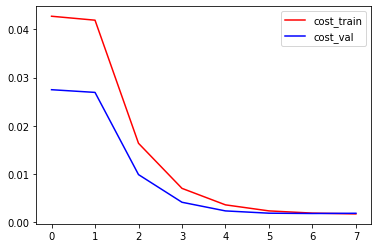

In [101]:
plt.plot(C_train, 'r', label='cost_train')
plt.plot(C_val, 'b', label='cost_val')
plt.legend()
plt.show()

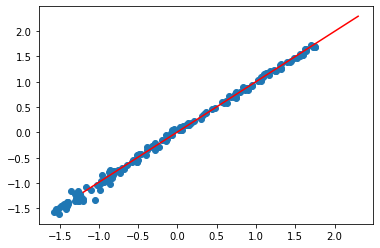

In [102]:
plt.scatter(X_train, y_train)
plt.plot(np.arange(-1.2,2.4,0.1), [(w0 + w1 * x)[0] for x in np.arange(-1.2,2.4,0.1)], 'r')
plt.show()

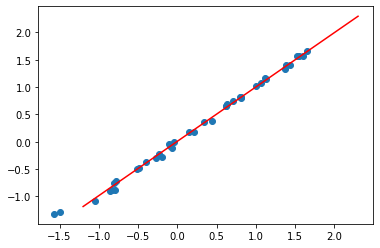

In [103]:
plt.scatter(X_val, y_val)
plt.plot(np.arange(-1.2,2.4,0.1), [(w0 + w1 * x)[0] for x in np.arange(-1.2,2.4,0.1)], 'r')
plt.show()

In [104]:
df_test= pd.read_csv('test_function.csv')
data_test = df_test[['X','y']].to_numpy()
X_test, y_test = data_test[:,0], data_test[:,1]

# X_test = X_test**2
# X_test = (X_test - mean_X)/std_X
# y_pred = w0 + w1*X_test
# y_pred = y_pred*std_y + mean_y

X_test = (X_test - mean_X)/std_X
y_pred = w0 + w1*X_test
y_pred = y_pred*std_y + mean_y
y_pred = y_pred**2

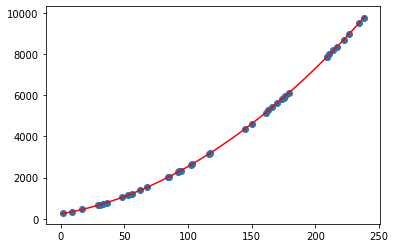

In [105]:
#plt.figure(figsize=(20,7))
plt.scatter(data_test[:,0], y_pred)
plt.plot(np.arange(0,240,1), [((w0 + w1*(x-mean_X)/std_X)[0]*std_y + mean_y)**2 for x in np.arange(0,240,1)], 'r')
#plt.plot(np.arange(0,240,1), [((w0 + w1*((x**2-mean_X)/std_X))[0]*std_y + mean_y) for x in np.arange(0,240,1)], 'r')
plt.show()

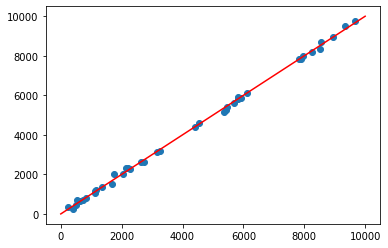

In [106]:
#plt.figure(figsize=(20,7))
plt.scatter(y_test, y_pred)
plt.plot(np.arange(10000),np.arange(10000) ,'r')
plt.show()

In [107]:
n_test = len(y_test)
MAE = (1/n_test)*sum([abs(y_pred[i] - y_test[i]) for i in range(n_test)])
MSE = (1/n_test)*sum([(y_pred[i] - y_test[i])**2 for i in range(n_test)])
RMSE = np.sqrt(MSE)

print(f'RSME: {RMSE}, MAE: {MAE}')

RSME: 99.49575423192064, MAE: 76.46687047051886


In [108]:
n_test = len(y_test)
MAE = (1/n_test)*sum([abs(y_pred[i] - y_test[i]) for i in range(n_test)])
MSE = (1/n_test)*sum([(y_pred[i] - y_test[i])**2 for i in range(n_test)])
RMSE = np.sqrt(MSE)

print(f'RSME: {RMSE}, MAE: {MAE}')

RSME: 99.49575423192064, MAE: 76.46687047051886
